In [7]:
import numpy as np
from matplotlib import pyplot as plt
import mdct

# Exercises:

### a. MDCT:
In this exercise you will implement a time-to-frequency mapping using the MDCT. You will verify that the mapping leads to perfect reconstruction and that the fast implementation is significantly faster than straightforward implementation. Your fast MDCTIIMDCT implementation will be useful for later exercises.
1. Program functions to carry out the MDCT and IMDCT using the transform definitions.

In [8]:
def mdct_naive(x, window = None):
    N = len(x)
    if window is None: window = np.ones(N)
    if N%2 != 0: raise ValueError("N deve ser inteiro par")
    n_0 = (N/2 + 1)/2
    X = np.zeros(N//2)
    for k in range(N//2):
        for n in range(N):
            arg =  2 * np.pi * (n+n_0) * (k+0.5) / N
            X[k] += window[n] * x[n] * np.cos(arg)
            # print(f'k={k}, arg={arg}')
    if len(X) != N//2: raise ValueError(f"deve ter tamanho N/2, len = {len(X)}")
    return X

class MDCT():
    def _init_(self, N: int, window: np.ndarray):
        K = N//2
        n_0 = ((N/2) + 1)/2

        A = np.zeros((K,N))
        for k in range(K):
            for n in range(N):
                A[k,n] = np.cos((2*np.pi/N)(n + n_0)(k+1/2))

        self.N = N
        self.window = window
        self.A_1 = A[:,:N//2]
        self.A_2 = A[:,N//2:]
        self.B_1 = (4/N)*self.A_1.T
        self.B_2 = (4/N)*self.A_2.T

        self.A = A
        self.B = (4/N)*A.T

        if window.shape[0] != N:
            raise ValueError(f"Window is not the same size as N! Window size: {window.shape[0]}")

    def _preprocess(self, x: np.ndarray):
        L = len(x)
        self.frames = L//(self.N//2) + 1
        r = L%(self.N//2)
        return np.pad(x, (self.N // 2, self.N // 2 - r))


    def mdct(self, x: np.ndarray):
        x_padded = self._preprocess(x)
        # self.x_padded_len = len(x_padded)
        # X => K x f

        X = np.ndarray((self.A.shape[0], self.frames))
        for frame in range(self.frames):
            # A => K x N
            # x_windowed => N x 1
            # A * x_windowed => K x 1
            X[:, frame] = self.A @ (x_padded[frame*(self.N//2):frame*(self.N//2)+self.N] * self.window)

        return X

    # flippar a janela
    # remover o padding na volta
    def imdct(self, X: np.ndarray):
        x_padded = np.zeros(self.frames * self.N - self.N)
        for frame in range(self.frames):
            # A => K x N
            # x_windowed => N x 1
            # A * x_windowed => K x 1
            # X => K linhas, N colunas
            x_padded += self.B @ (X[:,frame] * self.window)
        return X



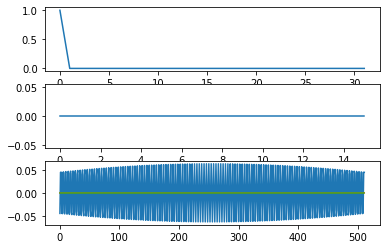

In [4]:
X = [1,1,1,1]
# vanilla = imdct_vanilla(X)
# naive = imdct_naive(X)
# print(vanilla)
# print(naive)

x = np.zeros()
x[0] = 1
fig, ax = plt.subplots(nrows = 3, ncols = 1)
ax[0].plot(x)
X = mdct_naive(x, window=np.hanning(32))
ax[1].plot(X)
ax[2].plot(mdct.mdct(x))


In [ ]:
def pre_twiddle(N):
    return np.exp(-2j * np.pi * np.arange(N) / N)

def post_twiddle(N):
    if N%2 != 0: raise ValueError("N deve ser inteiro par")
    n_0 = 1
    k = np.arange(N/2 - 1)
    return np.exp(-2j * np.pi * (k + 0.5) / N)


def mdct_via_fft(x):
   return np.re(post_twiddle(len(x)) * np.fft.fft(x * pre_twiddle(len(x))))

def imdct():
    return 1